## EDA theo hướng phân tán (Dispersion)

các mục cần làm là tính:
1. Range - khoảng biến thiên
2. Quartile - tứ phân vị
3. Interquartile Range (IQR) - độ trải giữa (khoảng tứ phân vị)
4. Variance - phương sai
5. Standard deviation (std) - độ lệch chuẩn
6. Coefficient of Variation (CV) - hệ số biến thiên


### Thêm các thư viện cần thiết

In [101]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

### Đọc data

In [102]:
data = pd.read_csv('../data/interim/handled_missing_values.csv')
data

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,Undergraduate,Medium,89,151,109
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,Undergraduate,Medium,70,160,101
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,Undergraduate,Low,52,133,94
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,Moderate,...,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22,134,91
2996,Male,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,Low,...,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19,110,78
2997,Male,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,Moderate,...,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85,159,116
2998,Female,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,Moderate,...,Good,Insomnia,7.920076,4.452130,5.051613,Undergraduate,High,30,134,82


### Kiểm tra các kiểu của dữ liệu

In [103]:
data.dtypes

Gender                 object
Height                float64
Weight                float64
Cholesterol           float64
BMI                   float64
Blood_Glucose         float64
Bone_Density          float64
Vision                float64
Hearing               float64
Physical_Activity      object
Smoking                object
Alcohol                object
Diet                   object
Chronic_Diseases       object
Medication             object
Family_History         object
Cognitive_Function    float64
Mental_Health          object
Sleep                  object
Stress                float64
Pollution             float64
Sun_Exposure          float64
Education              object
Income                 object
Age                     int64
Systolic_BP             int64
Diastolic_BP            int64
dtype: object

### Xem tóm tắt của data

In [104]:
data.describe()

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,Pollution,Sun_Exposure,Age,Systolic_BP,Diastolic_BP
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667,146.027333,95.567000
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690,15.968080,9.923256
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000,97.000000,60.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000,135.000000,89.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000,146.000000,95.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000,157.000000,103.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000,193.000000,133.000000


### lấy ra các cột là biến số

In [105]:
numeric_columns = data.select_dtypes(include=['number']).columns
print("Các cột có kiểu số:")
print(numeric_columns)


Các cột có kiểu số:
Index(['Height', 'Weight', 'Cholesterol', 'BMI', 'Blood_Glucose',
       'Bone_Density', 'Vision', 'Hearing', 'Cognitive_Function', 'Stress',
       'Pollution', 'Sun_Exposure', 'Age', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


### lấy ra các cột là biến phân loại

In [106]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Các cột có kiểu category:")
print(categorical_columns)

Các cột có kiểu category:
Index(['Gender', 'Physical_Activity', 'Smoking', 'Alcohol', 'Diet',
       'Chronic_Diseases', 'Medication', 'Family_History', 'Mental_Health',
       'Sleep', 'Education', 'Income'],
      dtype='object')


In [107]:
df = pd.DataFrame(data)

In [108]:
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))

### Khởi tạo OneHotEncoder

In [109]:
encoder = OneHotEncoder(sparse_output=False, drop='first')

### Chuyển đổi các cột phân loại

In [110]:
encoded_data = encoder.fit_transform(df[categorical_columns])


### Chuyển đổi kết quả thành DataFrame và đặt tên cột

In [111]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

### Kết hợp lại với các cột còn lại

In [112]:
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [113]:
print("DataFrame sau khi chuyển đổi các cột phân loại bằng OneHotEncoder:\n", df)

DataFrame sau khi chuyển đổi các cột phân loại bằng OneHotEncoder:
           Height     Weight  Cholesterol        BMI  Blood_Glucose  \
0     171.148359  86.185197   259.465814  29.423017     157.652848   
1     172.946206  79.641937   263.630292  26.626847     118.507805   
2     155.945488  49.167058   207.846206  20.217553     143.587550   
3     169.078298  56.017921   253.283779  19.595270     137.448581   
4     163.758355  73.966304   236.119899  27.582078     145.328695   
...          ...        ...          ...        ...            ...   
2995  161.632502  88.323405   204.175510  33.807917     112.075747   
2996  163.443512  93.217007   197.384424  34.894725     101.177692   
2997  177.857644  86.258847   238.641542  27.268332     110.548146   
2998  162.287164  41.371018   198.244328  15.708252     123.704379   
2999  175.341710  78.718038   279.118184  25.603762     156.577316   

      Bone_Density    Vision    Hearing  Cognitive_Function    Stress  ...  \
0         0.1

### Tính các range của các biến số

In [114]:
for col in numeric_columns:
    col_range = data[col].max() - data[col].min()
    print(f"Range của {col}: {col_range}")

Range của Height: 56.98123043155178
Range của Weight: 91.06093093023375
Range của Cholesterol: 182.48907542498767
Range của BMI: 31.279969670157726
Range của Blood_Glucose: 115.86926006866871
Range của Bone_Density: 2.2196160983475623
Range của Vision: 0.8625374576346181
Range của Hearing: 94.00382427807536
Range của Cognitive_Function: 76.0977325829051
Range của Stress: 8.995894720116976
Range của Pollution: 9.99169512584789
Range của Sun_Exposure: 11.990449193491337
Range của Age: 71
Range của Systolic_BP: 96
Range của Diastolic_BP: 73


In [115]:
ranges = df.max() - df.min()

print("Range của các biến đã được xử lý:")
print(ranges)

Range của các biến đã được xử lý:
Height                             56.981230
Weight                             91.060931
Cholesterol                       182.489075
BMI                                31.279970
Blood_Glucose                     115.869260
Bone_Density                        2.219616
Vision                              0.862537
Hearing                            94.003824
Cognitive_Function                 76.097733
Stress                              8.995895
Pollution                           9.991695
Sun_Exposure                       11.990449
Age                                71.000000
Systolic_BP                        96.000000
Diastolic_BP                       73.000000
Gender_Male                         1.000000
Physical_Activity_Low               1.000000
Physical_Activity_Moderate          1.000000
Smoking_Former                      1.000000
Smoking_Never                       1.000000
Alcohol_Occasional                  1.000000
Diet_High-fat        

### Tính độ lệch chuẩn, phương sai và hệ số biến thiên

In [116]:
print("Độ lệch chuẩn, phương sai và hệ số biến thiên của các cột số:")
for col in numeric_columns:
    std_dev = data[col].std()
    variance = data[col].var()
    mean = data[col].mean()
    cv = (std_dev / mean) * 100
    print(f"{col} - Độ lệch chuẩn: {std_dev:.2f}, phương sai: {variance:.2f}, Hệ số biến thiên: {cv:.2f}%")

Độ lệch chuẩn, phương sai và hệ số biến thiên của các cột số:
Height - Độ lệch chuẩn: 9.29, phương sai: 86.36, Hệ số biến thiên: 5.51%
Weight - Độ lệch chuẩn: 13.19, phương sai: 174.00, Hệ số biến thiên: 18.18%
Cholesterol - Độ lệch chuẩn: 24.52, phương sai: 601.30, Hệ số biến thiên: 10.48%
BMI - Độ lệch chuẩn: 4.37, phương sai: 19.07, Hệ số biến thiên: 17.09%
Blood_Glucose - Độ lệch chuẩn: 18.23, phương sai: 332.19, Hệ số biến thiên: 14.39%
Bone_Density - Độ lệch chuẩn: 0.44, phương sai: 0.20, Hệ số biến thiên: 47.60%
Vision - Độ lệch chuẩn: 0.21, phương sai: 0.04, Hệ số biến thiên: 44.19%
Hearing - Độ lệch chuẩn: 14.34, phương sai: 205.53, Hệ số biến thiên: 30.49%
Cognitive_Function - Độ lệch chuẩn: 11.76, phương sai: 138.20, Hệ số biến thiên: 18.41%
Stress - Độ lệch chuẩn: 2.58, phương sai: 6.68, Hệ số biến thiên: 47.20%
Pollution - Độ lệch chuẩn: 2.87, phương sai: 8.24, Hệ số biến thiên: 57.10%
Sun_Exposure - Độ lệch chuẩn: 3.47, phương sai: 12.07, Hệ số biến thiên: 58.34%
Age - Độ

In [117]:
for col in df.columns:
    std_dev = df[col].std()  
    variance = df[col].var() 
    mean = df[col].mean()
    cv = (std_dev / mean) * 100 if mean != 0 else 0
    
    print(f"{col} - Độ lệch chuẩn: {std_dev:.2f}, Phương sai: {variance:.2f}, Hệ số biến thiên: {cv:.2f}%")

Height - Độ lệch chuẩn: 9.29, Phương sai: 86.36, Hệ số biến thiên: 5.51%
Weight - Độ lệch chuẩn: 13.19, Phương sai: 174.00, Hệ số biến thiên: 18.18%
Cholesterol - Độ lệch chuẩn: 24.52, Phương sai: 601.30, Hệ số biến thiên: 10.48%
BMI - Độ lệch chuẩn: 4.37, Phương sai: 19.07, Hệ số biến thiên: 17.09%
Blood_Glucose - Độ lệch chuẩn: 18.23, Phương sai: 332.19, Hệ số biến thiên: 14.39%
Bone_Density - Độ lệch chuẩn: 0.44, Phương sai: 0.20, Hệ số biến thiên: 47.60%
Vision - Độ lệch chuẩn: 0.21, Phương sai: 0.04, Hệ số biến thiên: 44.19%
Hearing - Độ lệch chuẩn: 14.34, Phương sai: 205.53, Hệ số biến thiên: 30.49%
Cognitive_Function - Độ lệch chuẩn: 11.76, Phương sai: 138.20, Hệ số biến thiên: 18.41%
Stress - Độ lệch chuẩn: 2.58, Phương sai: 6.68, Hệ số biến thiên: 47.20%
Pollution - Độ lệch chuẩn: 2.87, Phương sai: 8.24, Hệ số biến thiên: 57.10%
Sun_Exposure - Độ lệch chuẩn: 3.47, Phương sai: 12.07, Hệ số biến thiên: 58.34%
Age - Độ lệch chuẩn: 20.57, Phương sai: 423.11, Hệ số biến thiên: 38.4

### Tính khoảng trải giữa

In [118]:
print("Interquartile Range (IQR) của các cột số:")
for col in df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col} - IQR: {IQR:.2f}")

Interquartile Range (IQR) của các cột số:
Height - IQR: 13.89
Weight - IQR: 18.48
Cholesterol - IQR: 33.89
BMI - IQR: 5.95
Blood_Glucose - IQR: 24.98
Bone_Density - IQR: 0.73
Vision - IQR: 0.36
Hearing - IQR: 20.09
Cognitive_Function - IQR: 16.44
Stress - IQR: 4.46
Pollution - IQR: 4.87
Sun_Exposure - IQR: 6.12
Age - IQR: 36.00
Systolic_BP - IQR: 22.00
Diastolic_BP - IQR: 14.00
Gender_Male - IQR: 1.00
Physical_Activity_Low - IQR: 1.00
Physical_Activity_Moderate - IQR: 1.00
Smoking_Former - IQR: 1.00
Smoking_Never - IQR: 1.00
Alcohol_Occasional - IQR: 0.00
Diet_High-fat - IQR: 0.00
Diet_Low-carb - IQR: 0.00
Diet_Vegetarian - IQR: 0.00
Chronic_Diseases_Heart Disease - IQR: 0.00
Chronic_Diseases_Hypertension - IQR: 0.00
Chronic_Diseases_Unknown - IQR: 1.00
Medication_Regular - IQR: 0.00
Family_History_Heart Disease - IQR: 0.00
Family_History_Hypertension - IQR: 0.00
Family_History_Unknown - IQR: 1.00
Mental_Health_Fair - IQR: 1.00
Mental_Health_Good - IQR: 1.00
Mental_Health_Poor - IQR: 0

### Vẽ box plot

/tmp/ipykernel_222378/3613901069.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col] for col in numeric_columns], labels=numeric_columns)


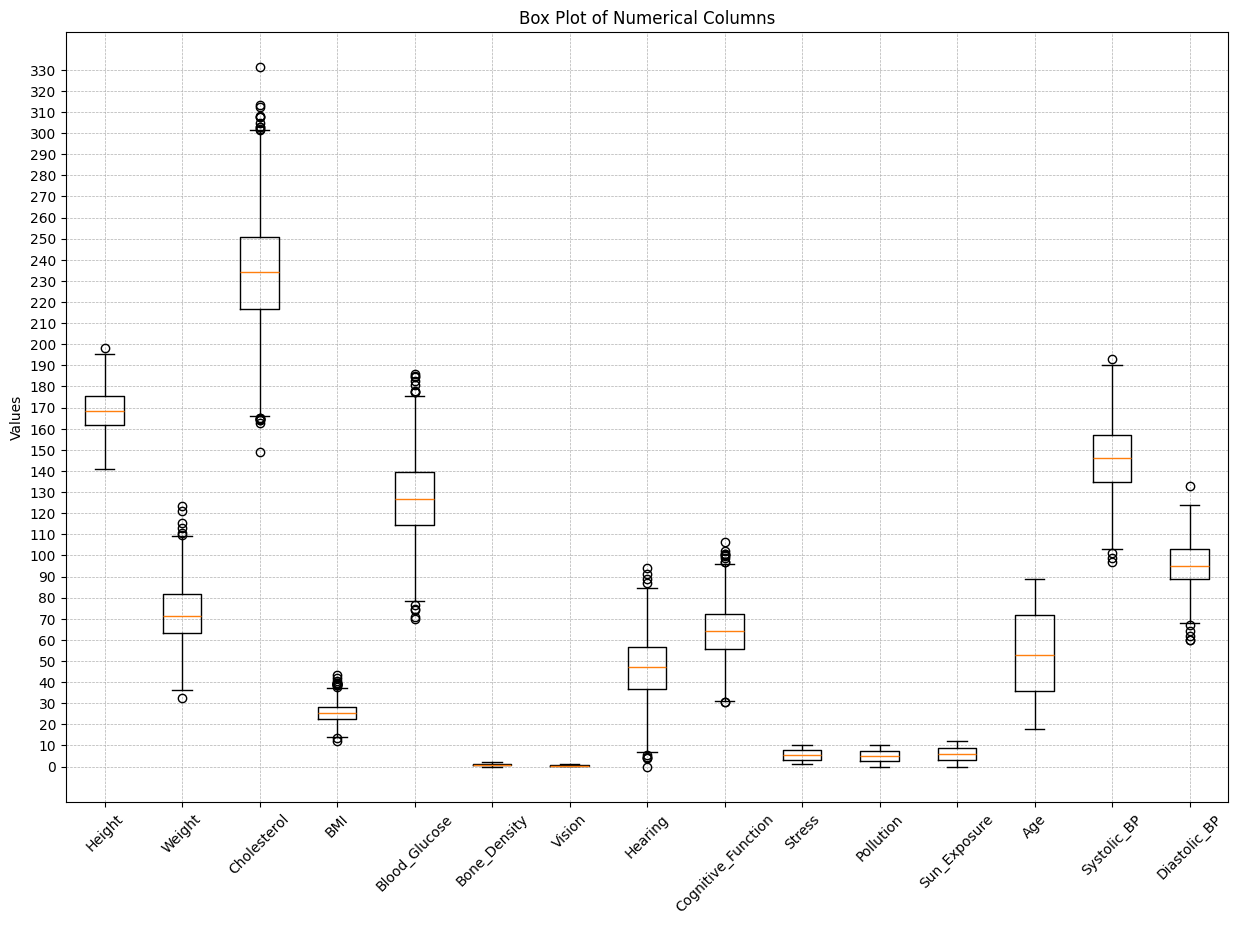

In [ ]:
plt.figure(figsize=(15, 10))
plt.boxplot([data[col] for col in numeric_columns], labels=numeric_columns)
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.grid(linestyle="--", linewidth=0.5)
plt.yticks(range(int(data[numeric_columns].min().min()), int(data[numeric_columns].max().max()) + 1, 10))
# plt.savefig(f"box plot_numerical columns.png", format='png', bbox_inches='tight') # lưu ảnh tự động
plt.show()

In [120]:
df_subset = df.iloc[:, :10]

/tmp/ipykernel_222378/3713922483.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_subset[col] for col in df_subset.columns], labels=df_subset.columns)


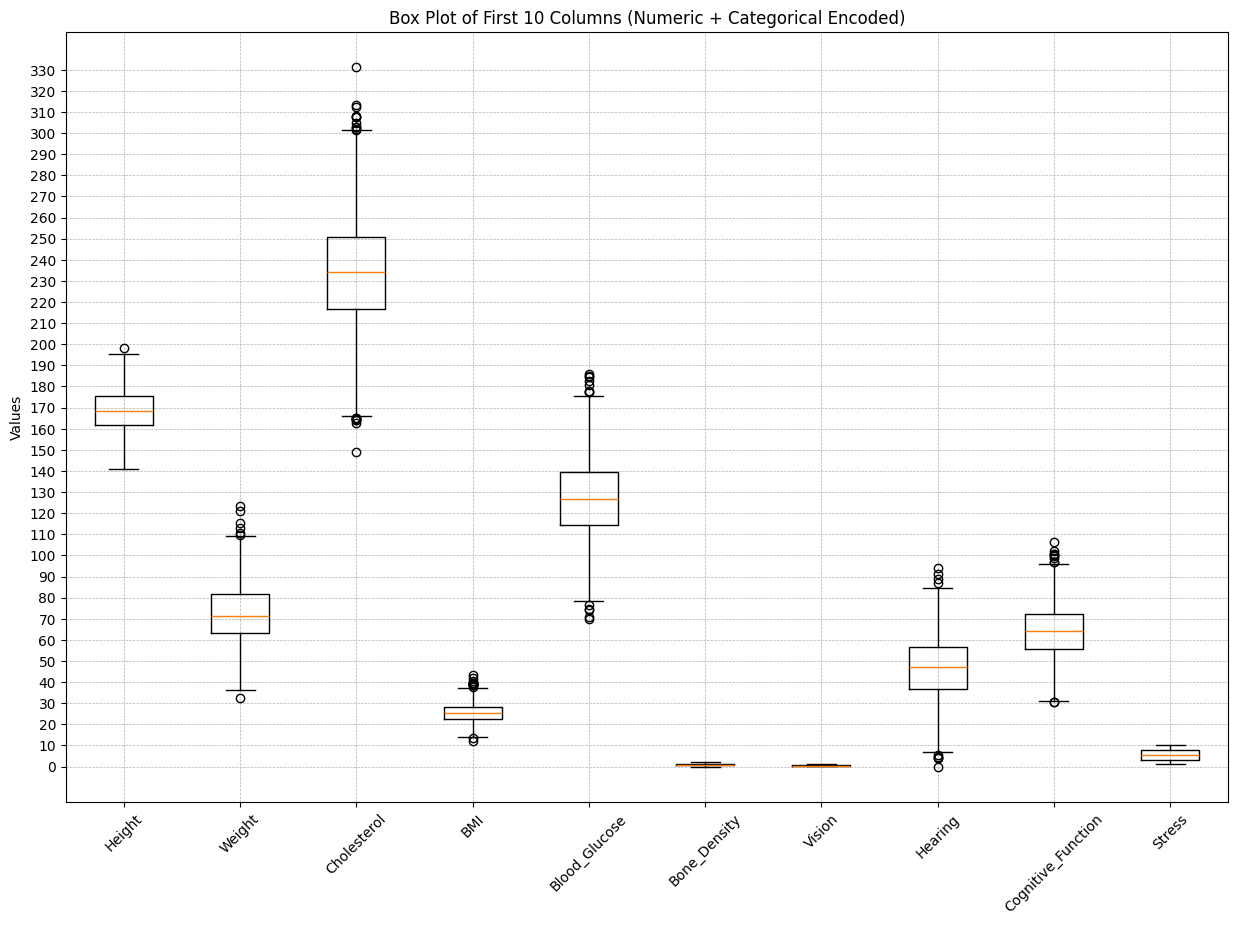

In [ ]:
plt.figure(figsize=(15, 10))
plt.boxplot([df_subset[col] for col in df_subset.columns], labels=df_subset.columns)
plt.title("Box Plot of First 10 Columns (Numeric + Categorical Encoded)")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.grid(linestyle="--", linewidth=0.5)

plt.yticks(range(int(df_subset.min().min()), int(df_subset.max().max()) + 1, 10))
# plt.savefig(f"box plot_10 columns from height to stress.png", format='png', bbox_inches='tight')
plt.show()

In [134]:
df_subset_next_10 = df.iloc[:, 10:20]

/tmp/ipykernel_222378/4068392239.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_subset_next_10[col] for col in df_subset_next_10.columns], labels=df_subset_next_10.columns)


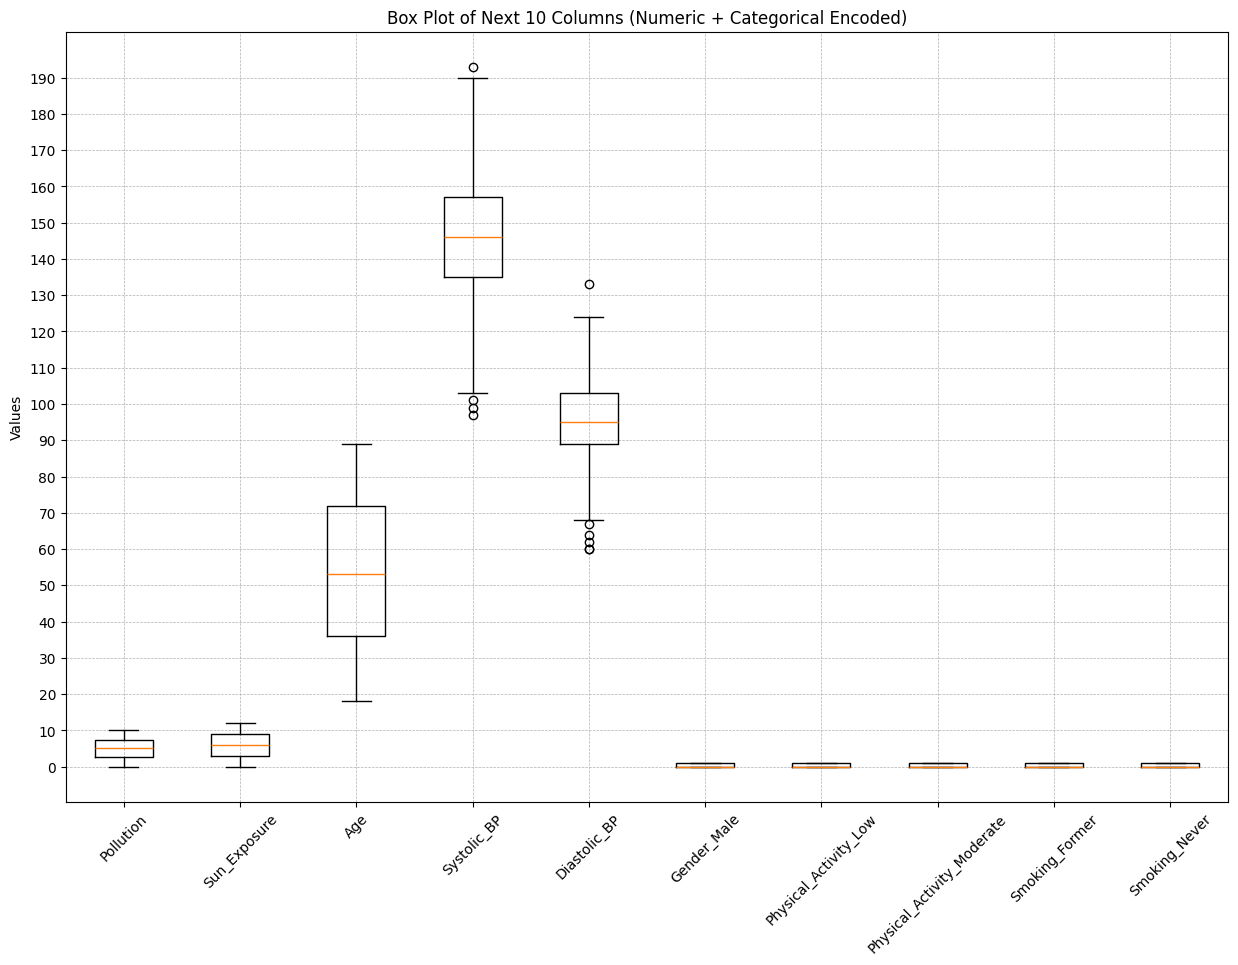

In [ ]:
plt.figure(figsize=(15, 10))
plt.boxplot([df_subset_next_10[col] for col in df_subset_next_10.columns], labels=df_subset_next_10.columns)
plt.title("Box Plot of Next 10 Columns (Numeric + Categorical Encoded)")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.grid(linestyle="--", linewidth=0.5)

plt.yticks(range(int(df_subset_next_10.min().min()), int(df_subset_next_10.max().max()) + 1, 10))
# plt.savefig(f"box plot_10 columns from pollution to smoking_never.png", format='png', bbox_inches='tight')
plt.show()

In [136]:
df_subset_next_10 = df.iloc[:, 20:30]

/tmp/ipykernel_222378/2660900556.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_subset_next_10[col] for col in df_subset_next_10.columns], labels=df_subset_next_10.columns)


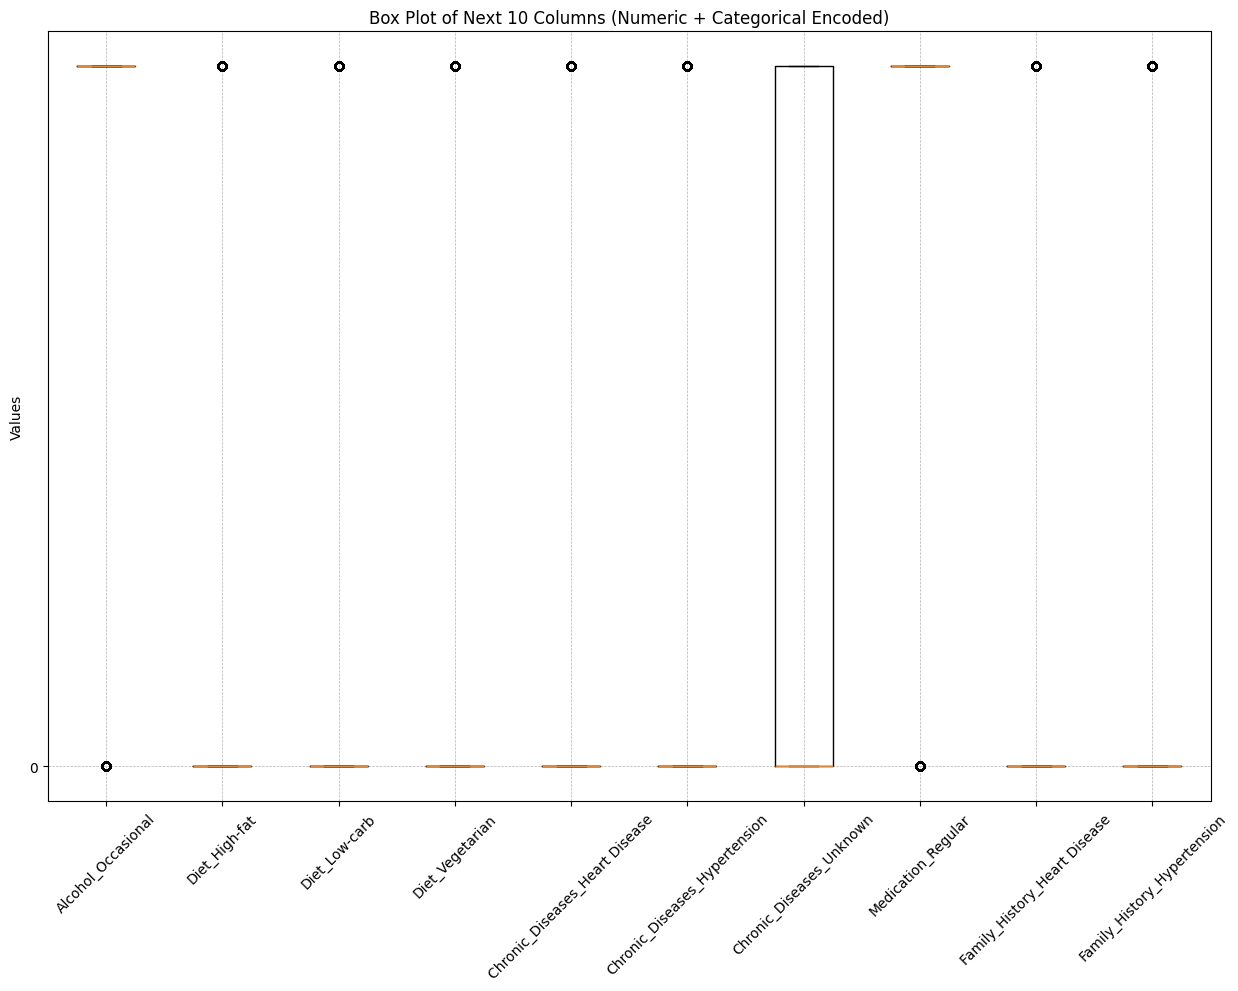

In [ ]:
plt.figure(figsize=(15, 10))
plt.boxplot([df_subset_next_10[col] for col in df_subset_next_10.columns], labels=df_subset_next_10.columns)
plt.title("Box Plot of Next 10 Columns (Numeric + Categorical Encoded)")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.grid(linestyle="--", linewidth=0.5)

plt.yticks(range(int(df_subset_next_10.min().min()), int(df_subset_next_10.max().max()) + 1, 10))
# plt.savefig(f"box plot_10 columns from alcohol_occasional to family_history_hypertension.png", format='png', bbox_inches='tight')
plt.show()

In [138]:
df_subset_next_10 = df.iloc[:, 30:40]

/tmp/ipykernel_222378/4200937245.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_subset_next_10[col] for col in df_subset_next_10.columns], labels=df_subset_next_10.columns)


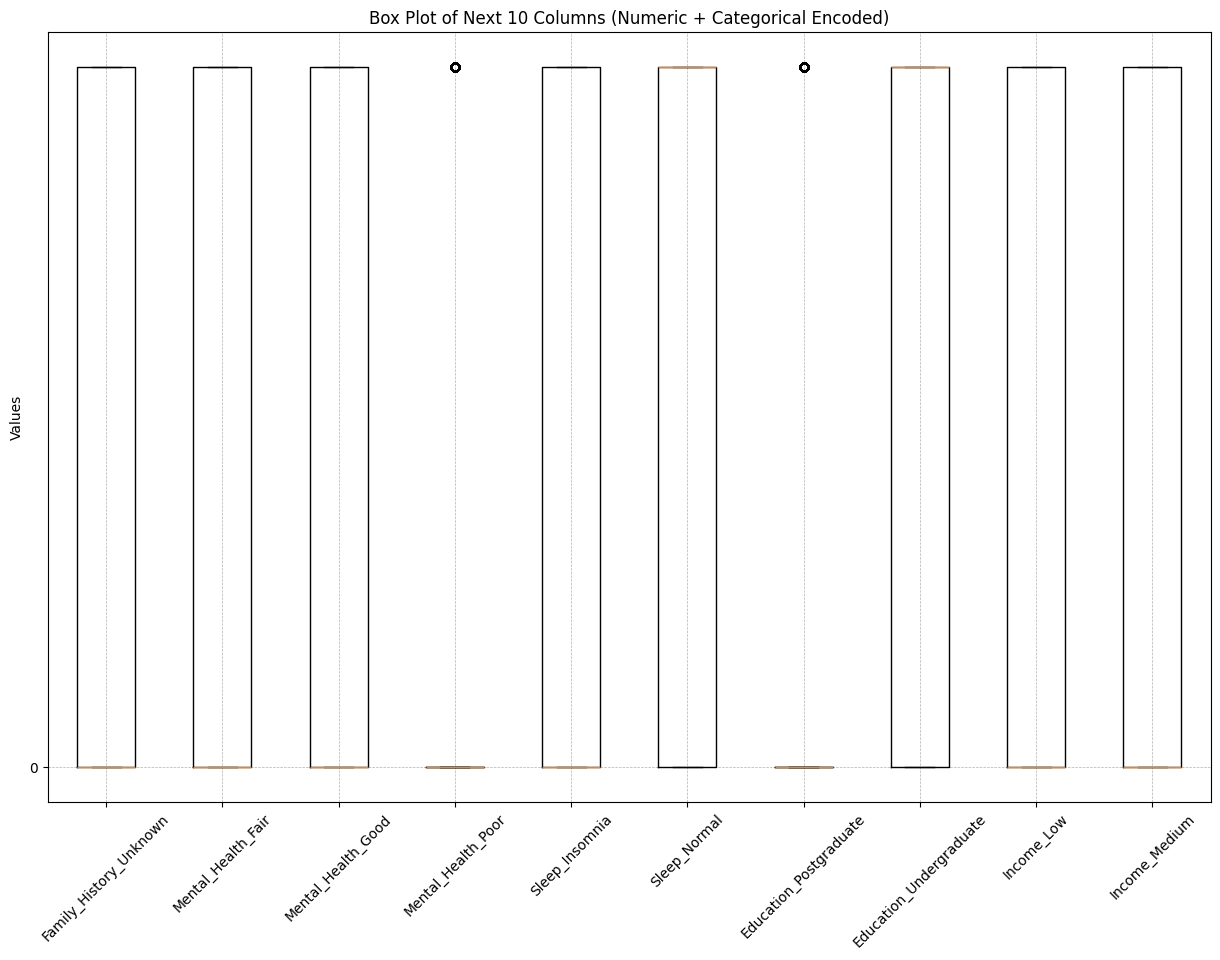

In [ ]:
plt.figure(figsize=(15, 10))
plt.boxplot([df_subset_next_10[col] for col in df_subset_next_10.columns], labels=df_subset_next_10.columns)
plt.title("Box Plot of Next 10 Columns (Numeric + Categorical Encoded)")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.grid(linestyle="--", linewidth=0.5)

plt.yticks(range(int(df_subset_next_10.min().min()), int(df_subset_next_10.max().max()) + 1, 10))
# plt.savefig(f"box plot_10 columns from family_history_unknown to income_medium.png", format='png', bbox_inches='tight')
plt.show()

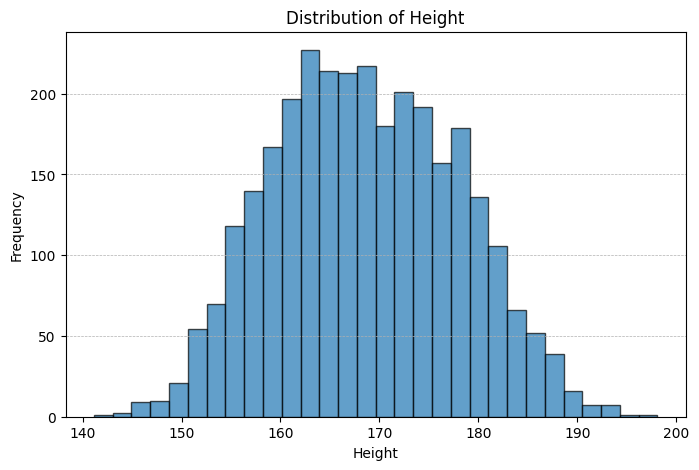

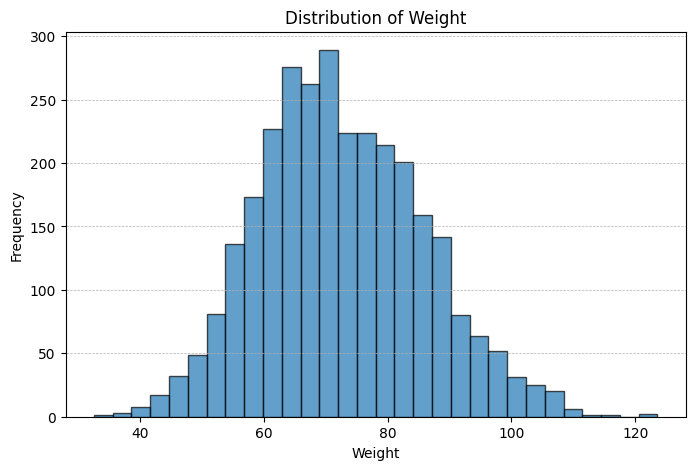

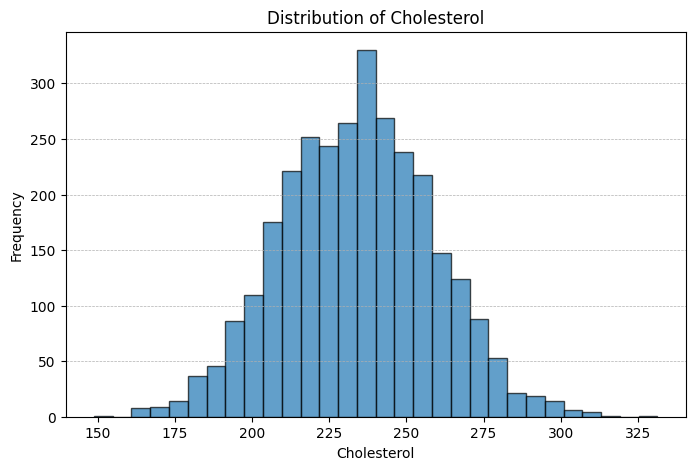

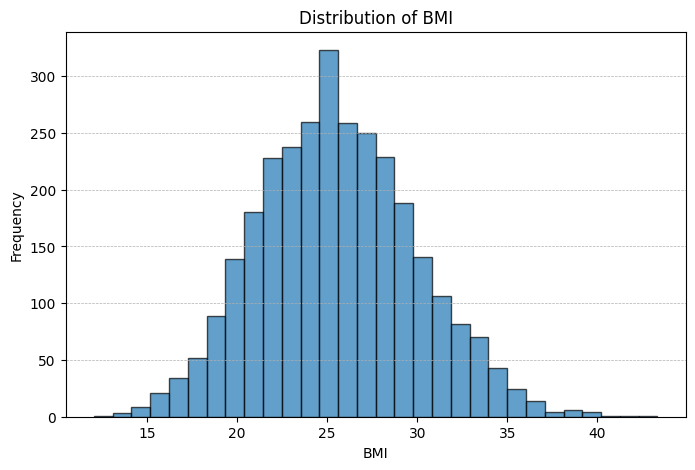

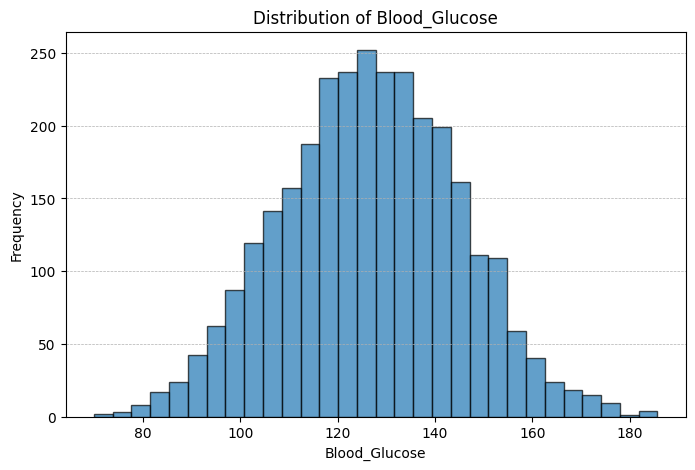

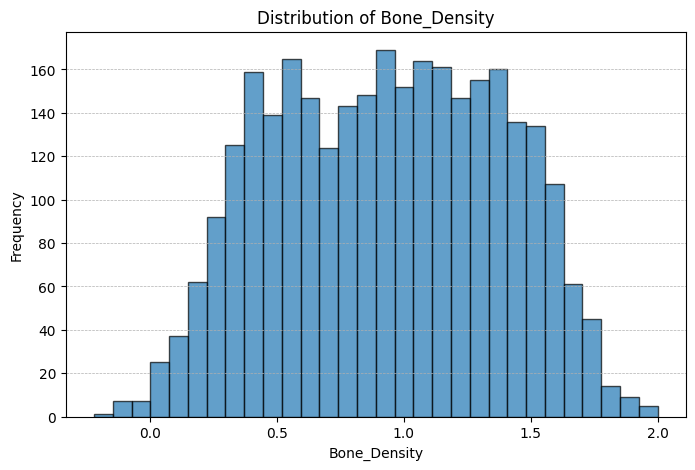

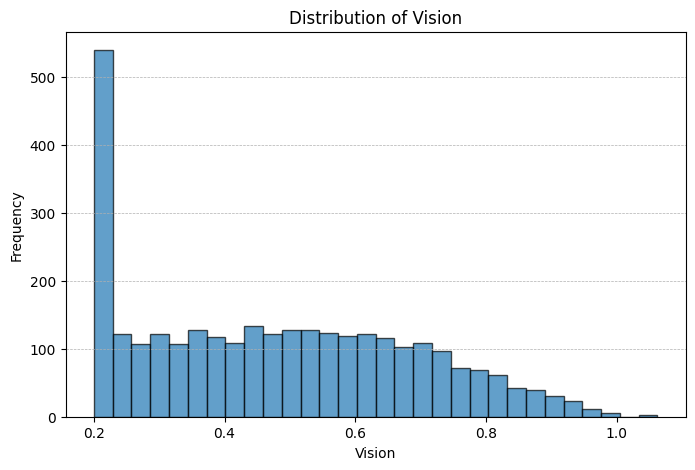

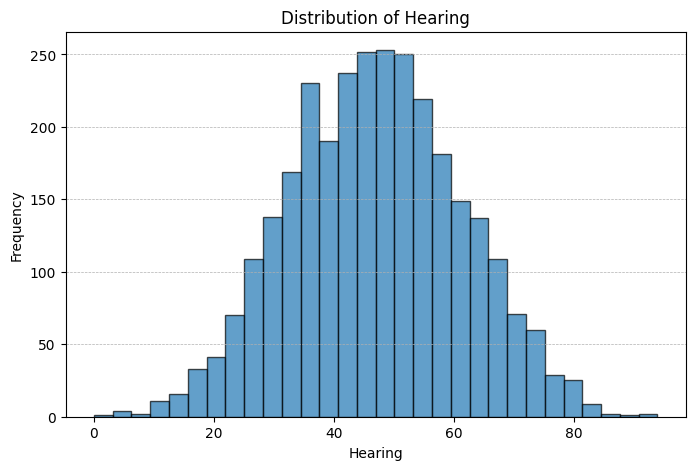

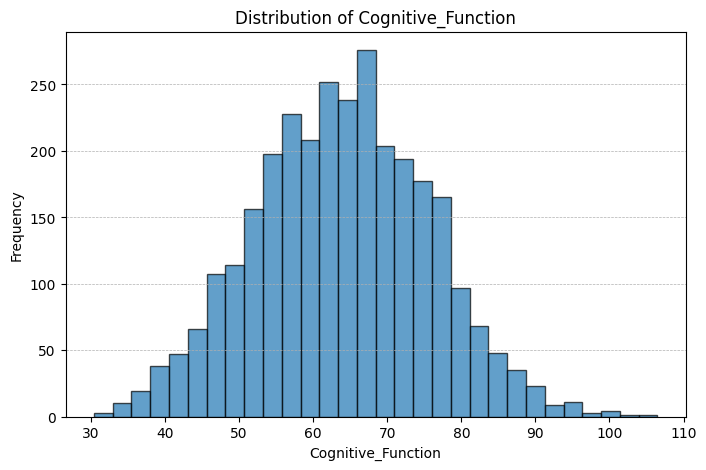

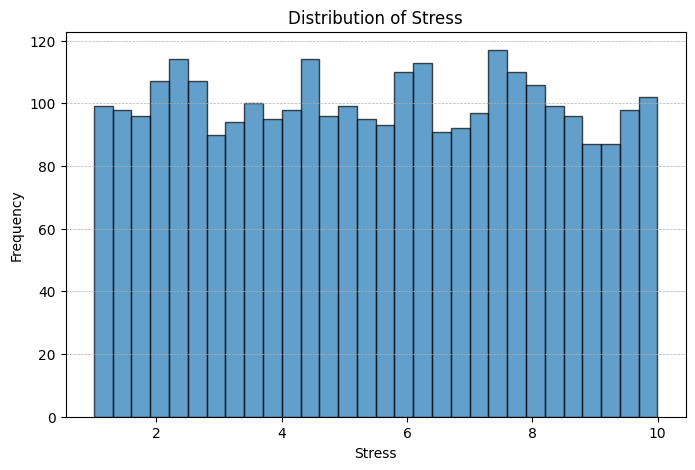

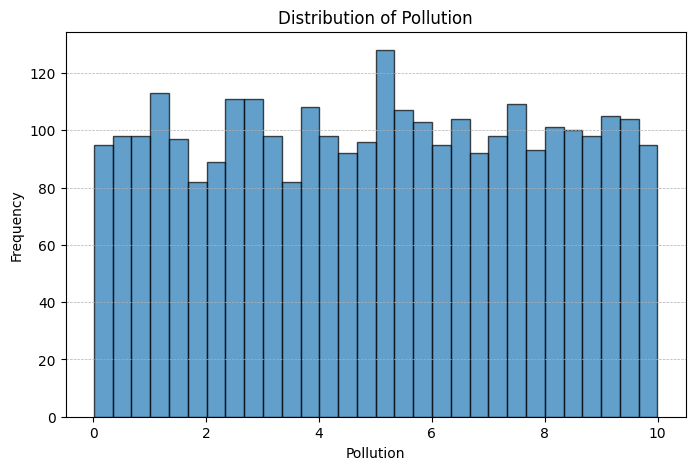

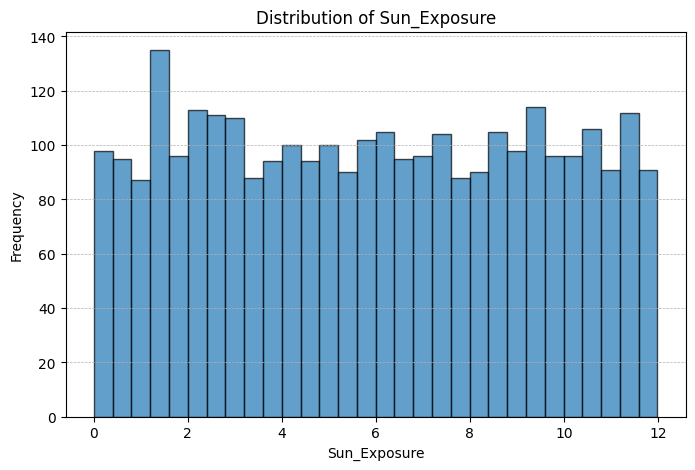

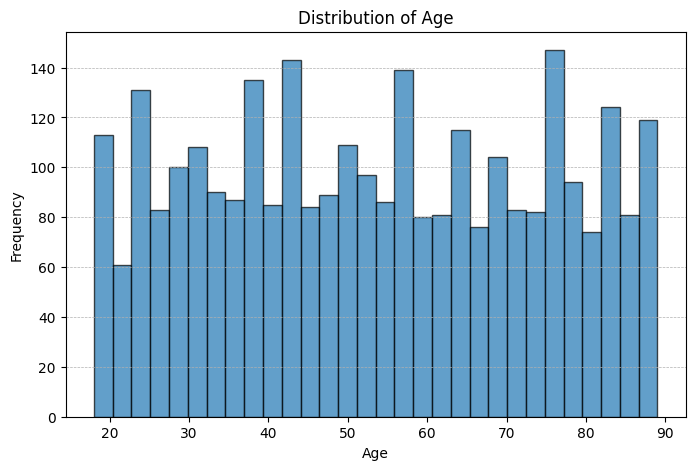

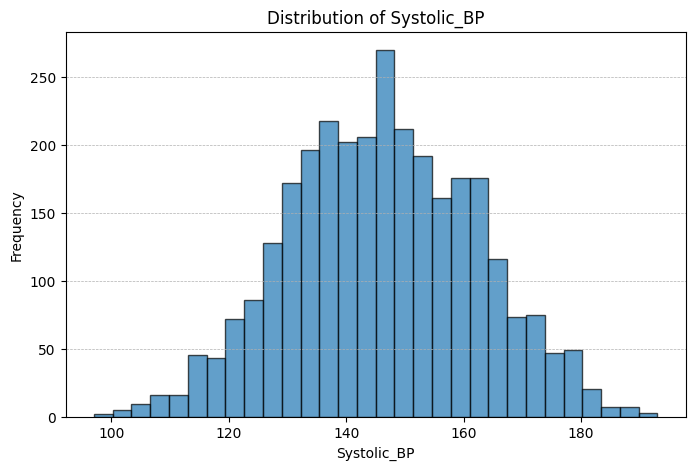

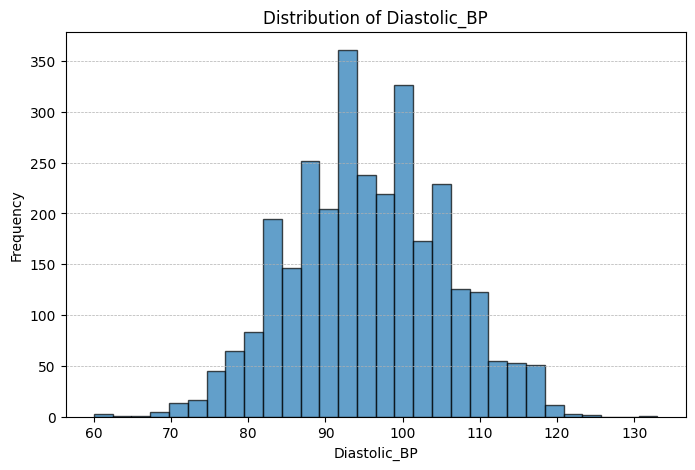

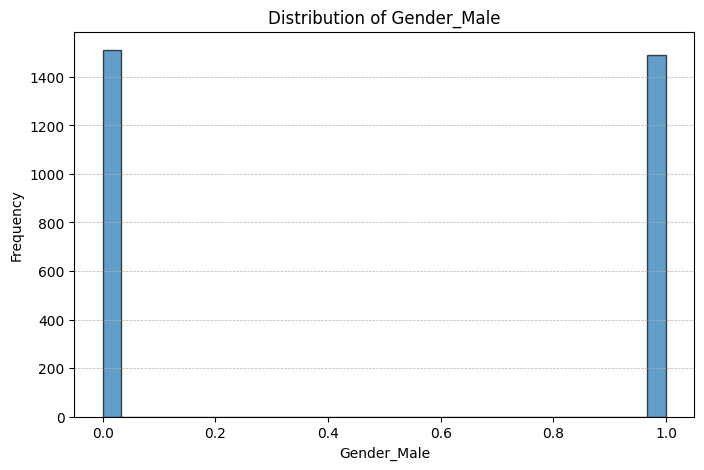

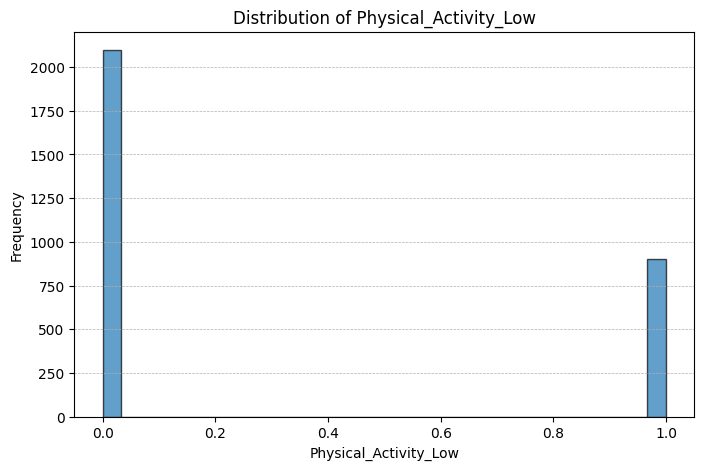

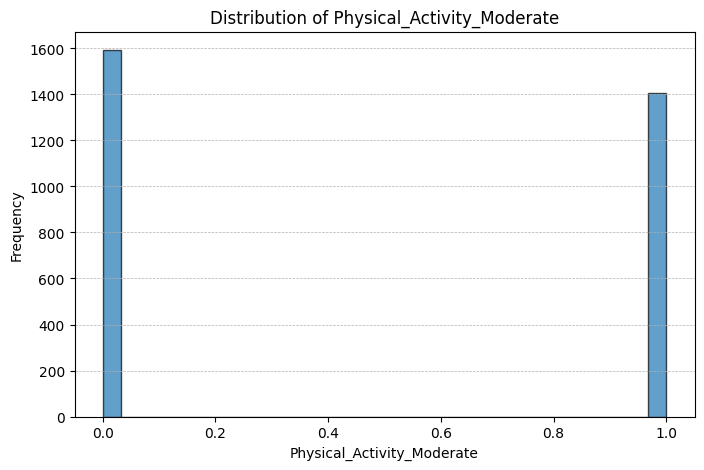

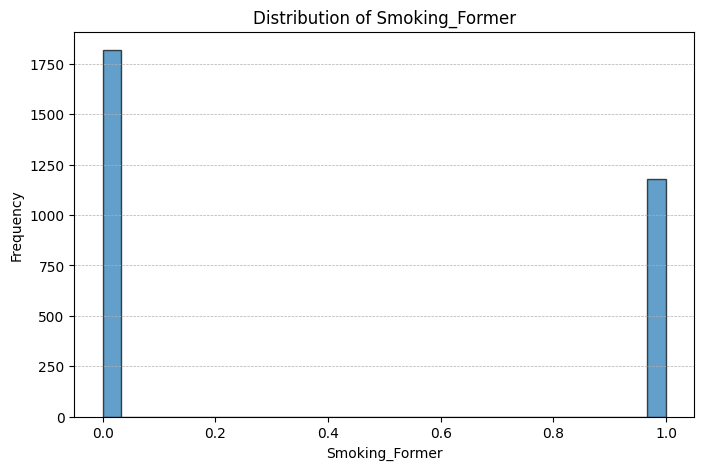

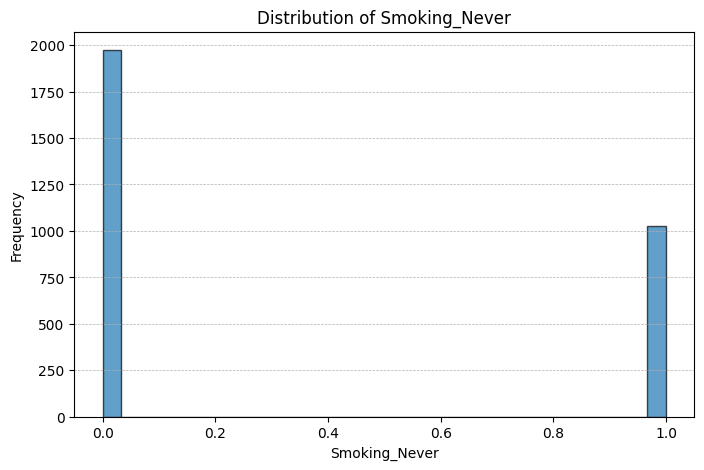

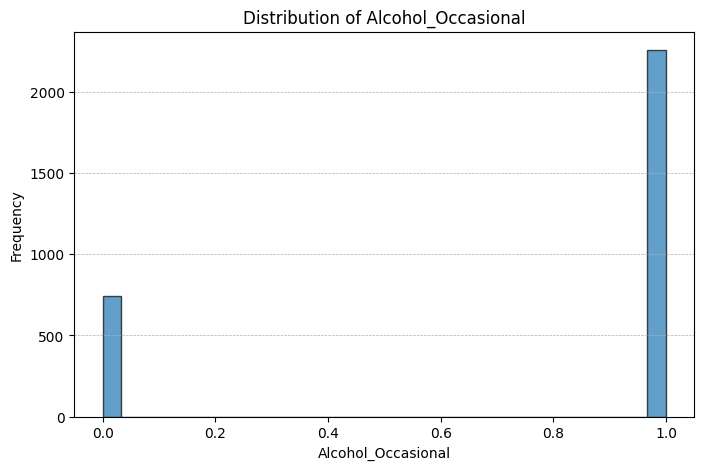

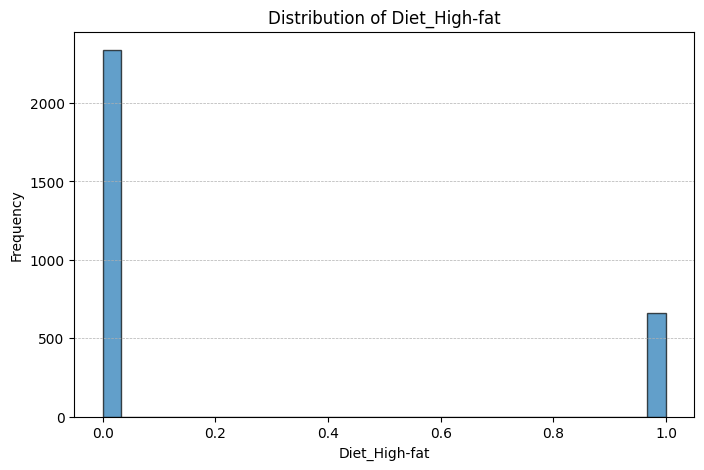

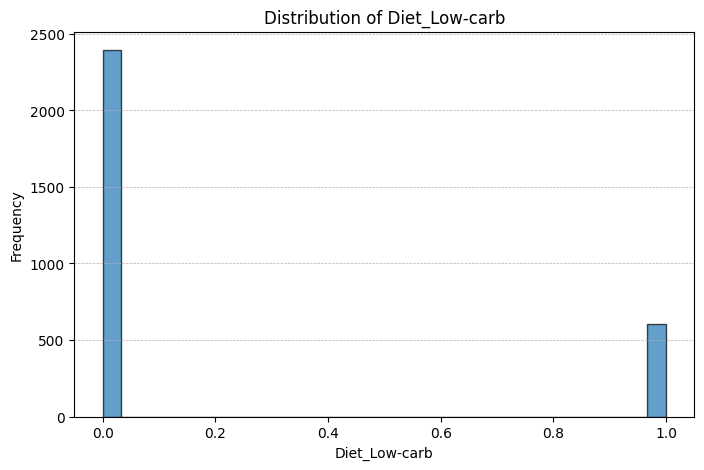

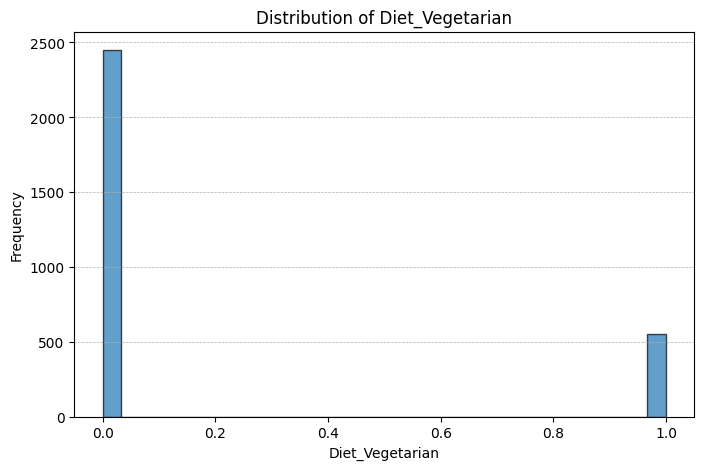

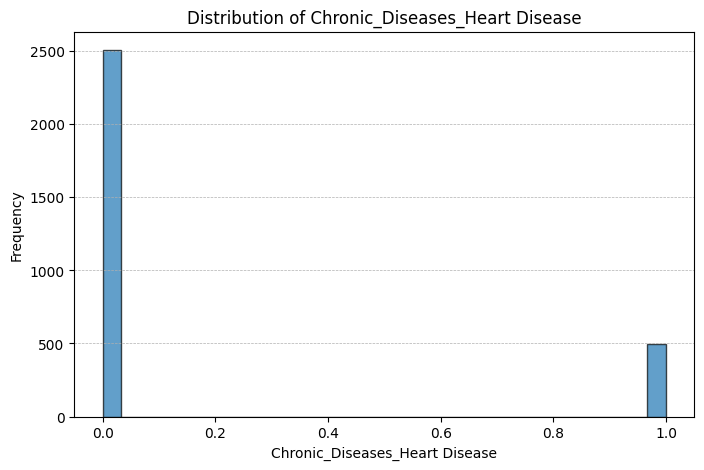

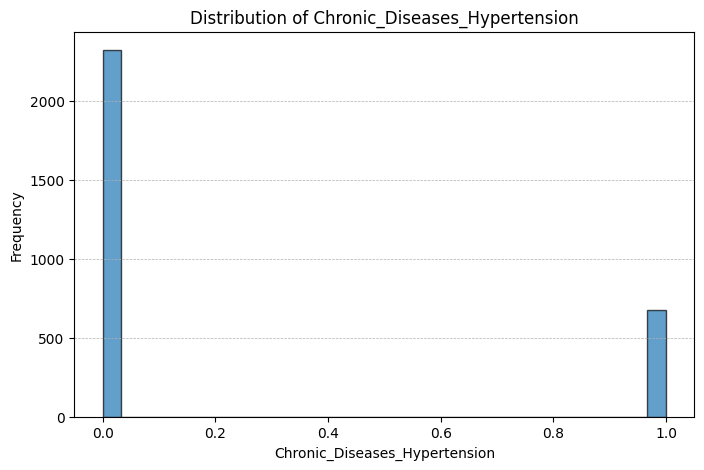

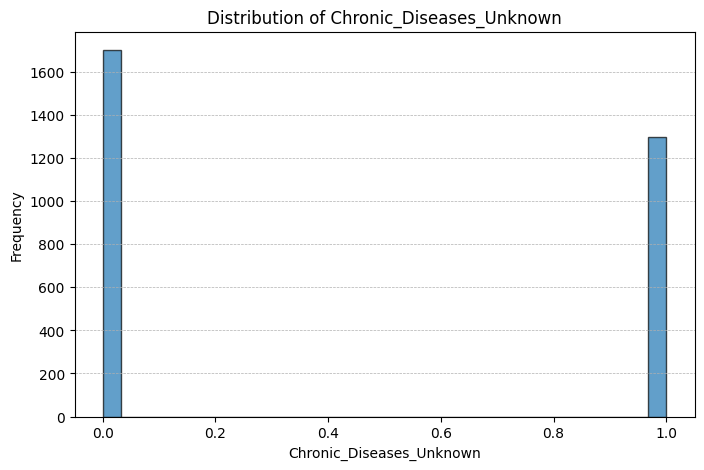

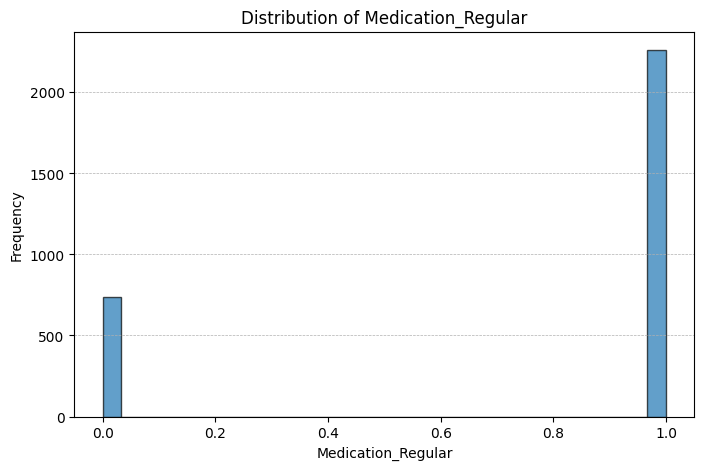

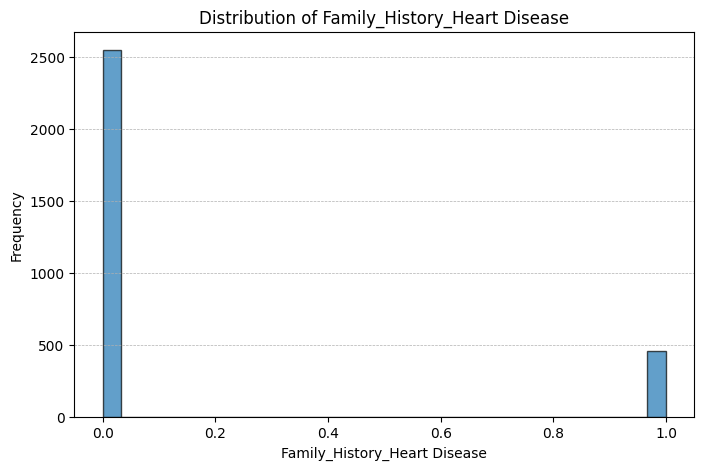

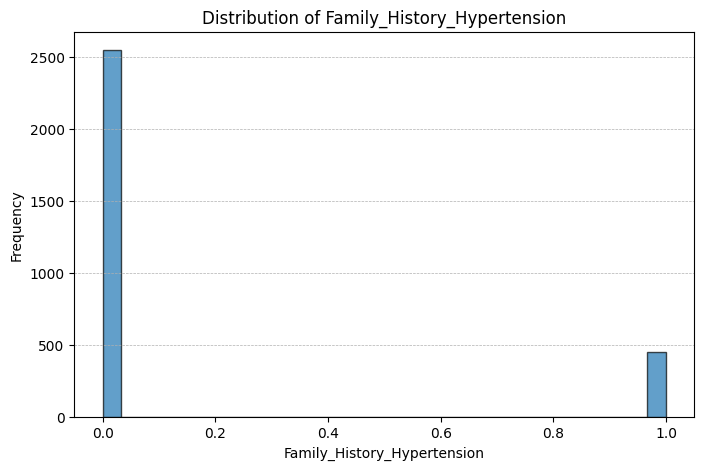

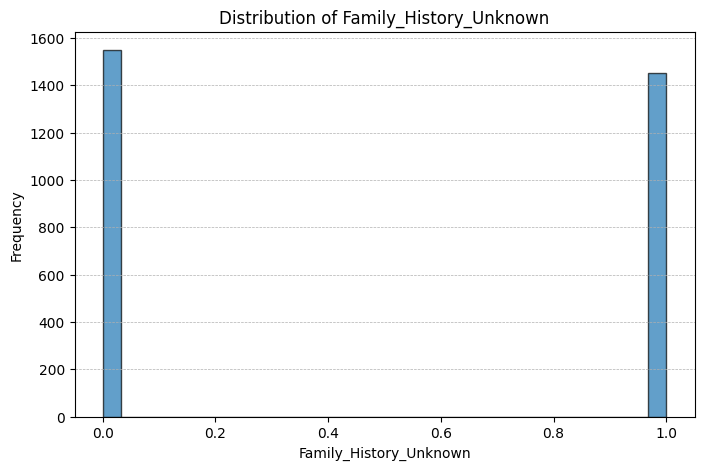

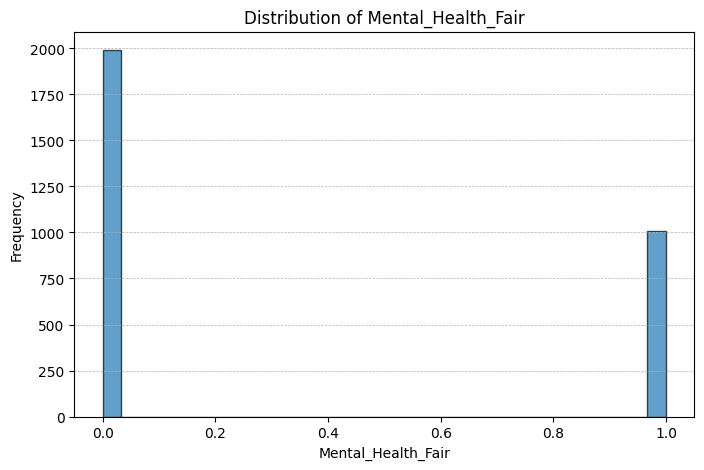

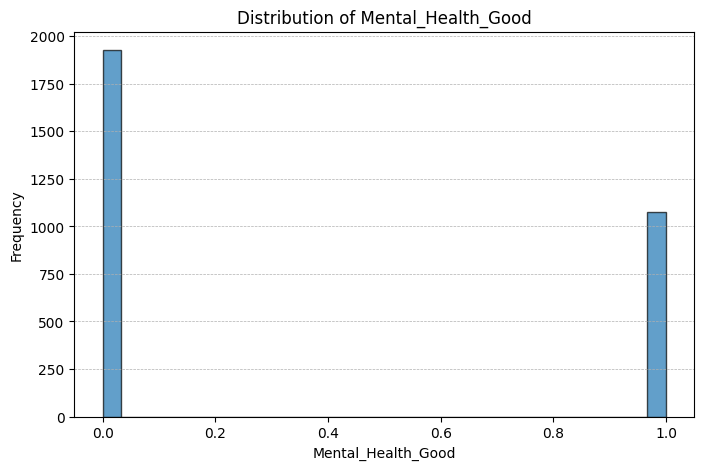

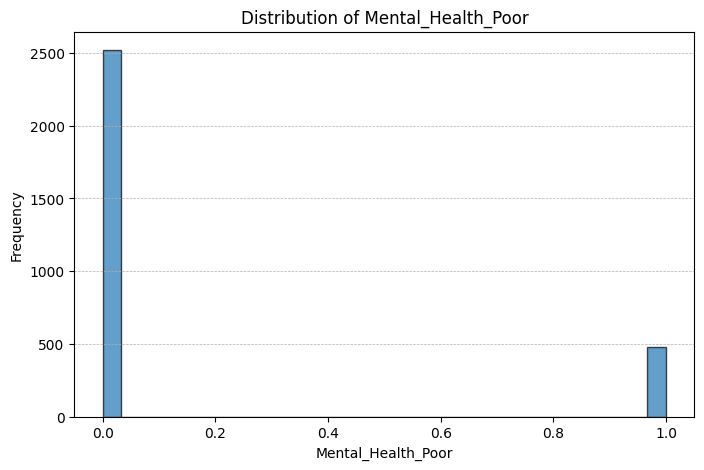

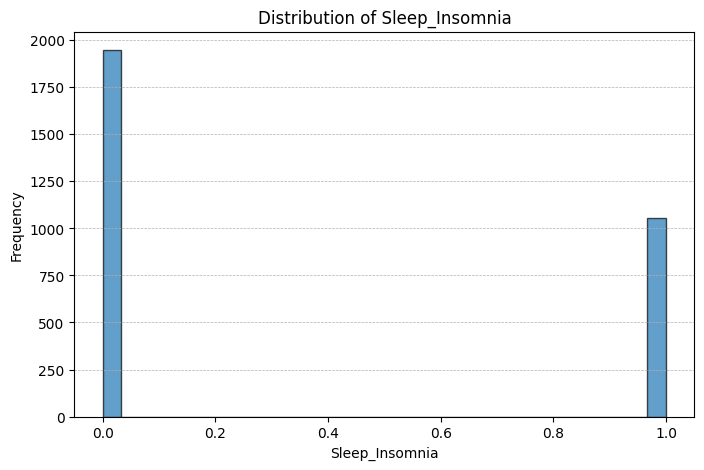

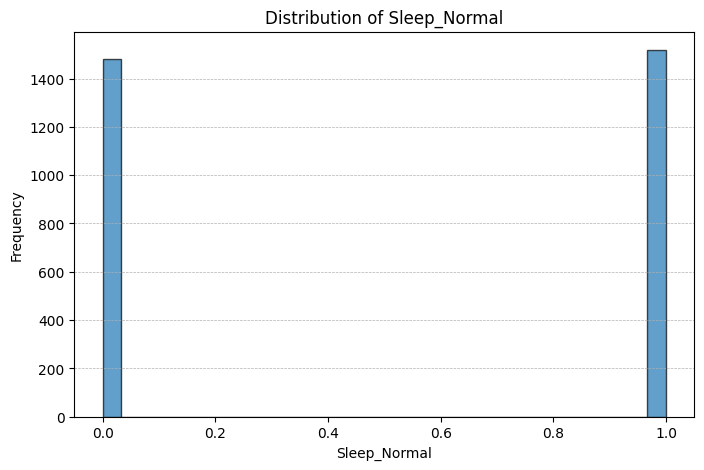

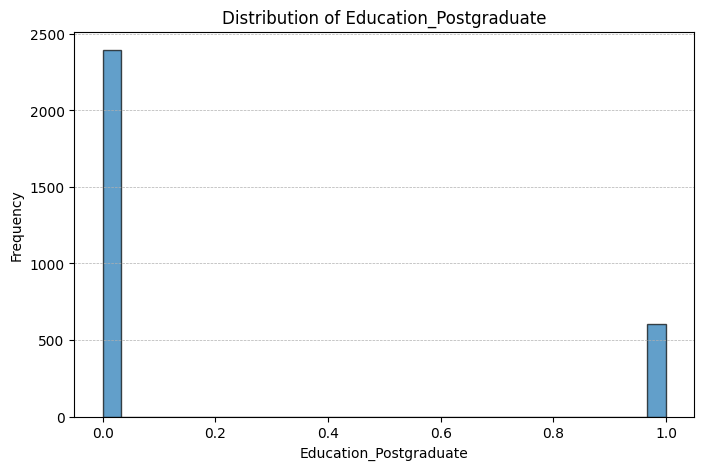

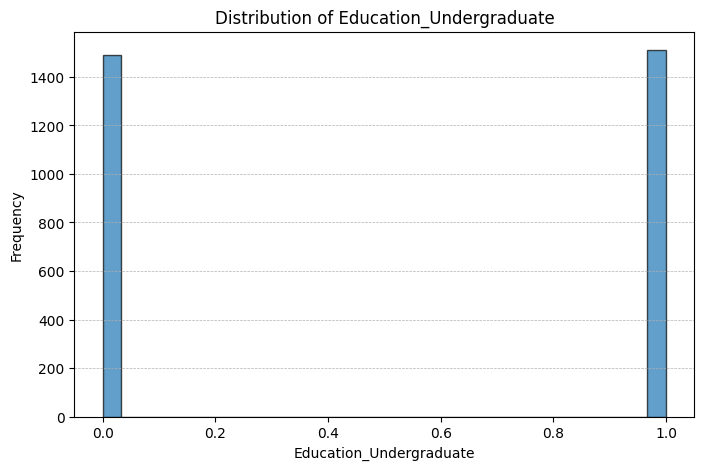

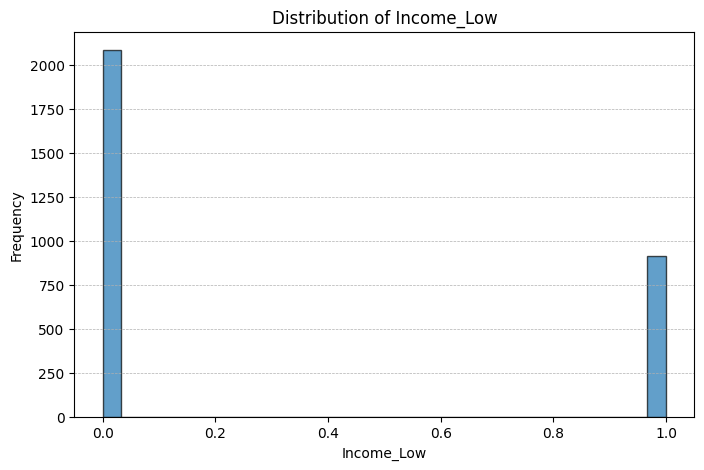

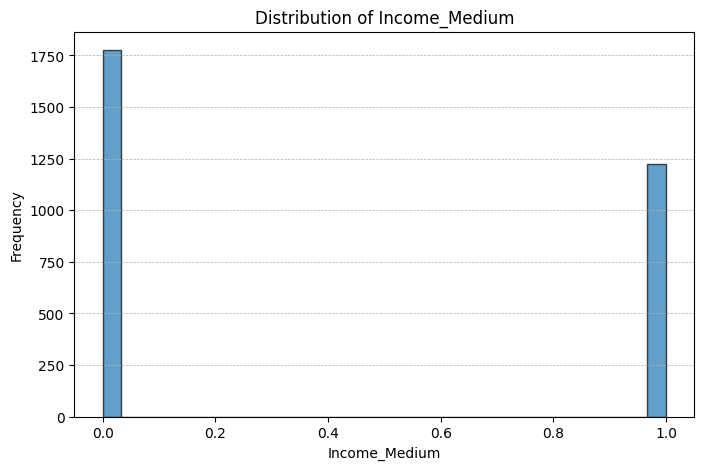

In [ ]:
for col in df.columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    # plt.savefig(f"histogram_{col}.png", format='png', bbox_inches='tight') # lưu ảnh tự động
    plt.show()

    # plt.close()

## Nhận xét
- 1. Height: 
Giá trị trung bình: Chiều cao trung bình có vẻ rơi vào khoảng 170 cm, nơi mà tần suất xuất hiện cao nhất. Độ lệch chuẩn: Chiều cao biến thiên không quá lớn, vì phần lớn dữ liệu tập trung trong khoảng 150-190 cm. Số ít ngoại lệ: Một số giá trị chiều cao ít gặp ở hai đầu (dưới 150 cm và trên 190 cm) xuất hiện với tần suất rất thấp.

- 2. Weight:
Giá trị trung bình: Cân nặng trung bình có vẻ rơi vào khoảng 70 kg, nơi mà tần suất xuất hiện cao nhất. Độ lệch chuẩn: Cân nặng biến thiên đáng kể, với phần lớn dữ liệu tập trung trong khoảng từ 40 đến 100 kg. Số ít ngoại lệ: Một số giá trị cân nặng ít gặp nằm ở hai đầu (dưới 40 kg và trên 110 kg) xuất hiện với tần suất rất thấp.

- 3. Cholesterol:
Giá trị trung bình: Mức cholesterol trung bình dường như rơi vào khoảng 225 mg/dL, đây là mức có tần suất xuất hiện cao nhất. Độ lệch chuẩn: Phần lớn dữ liệu nằm trong khoảng 200 - 275 mg/dL, cho thấy mức cholesterol của nhóm đối tượng khảo sát không quá biến động. Số ít ngoại lệ: Có một số giá trị ít gặp ở hai đầu của phân bố, dưới 175 mg/dL và trên 300 mg/dL.

- 4. BMI: 
Phân bố tần suất: Biểu đồ này cho thấy phân bố tần suất của các giá trị BMI. Tần suất cao nhất xảy ra ở khoảng BMI 25, cho thấy đây là giá trị BMI phổ biến nhất trong mẫu. Đặc điểm phân bố: Phân bố này có vẻ như là phân bố chuẩn (phân bố Gaussian) với một đỉnh tại BMI 25 và tần suất giảm dần đối xứng hai bên.

- 5. Blood_Glucose:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở mức đường huyết khoảng 120, cho thấy đây là mức đường huyết phổ biến nhất trong mẫu. Phân bố: Biểu đồ cho thấy phân bố tần suất của các mức đường huyết có dạng phân phối chuẩn (phân phối Gaussian), với tần suất cao nhất ở giữa và giảm dần về hai bên. Điều này ngụ ý rằng phần lớn giá trị đường huyết tập trung quanh mức trung bình.

- 6. Bone_Density:
Phân bố: Biểu đồ cho thấy phân bố tần suất của các giá trị mật độ xương, có dạng đối xứng và hình chuông, với tần suất cao nhất nằm ở khoảng giữa từ 0.5 đến 1.5. Điều này cho thấy phần lớn giá trị mật độ xương tập trung quanh mức trung bình.

- 7. Vision:
Phân bố: Biểu đồ cho thấy phần lớn dữ liệu tập trung quanh mức thị lực thấp. Tần suất cao nhất xuất hiện ở đầu dưới của thang đo thị lực, và giảm dần khi điểm số thị lực tăng lên, với sự phân tán ít hơn và tần suất thấp hơn ở các mức thị lực cao hơn.

- 8. Hearing:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở khoảng mức thính lực 40-50, cho thấy đây là mức thính lực phổ biến nhất trong mẫu. Phân bố: Biểu đồ cho thấy phân bố tần suất của các mức độ thính lực có dạng phân phối chuẩn (phân phối Gaussian), với tần suất cao nhất ở giữa và giảm dần đối xứng hai bên. Điều này ngụ ý rằng phần lớn giá trị thính lực tập trung quanh mức trung bình.

- 9. Cognitive_fuction:
Phân bố: Biểu đồ cho thấy phân bố tần suất của các điểm số chức năng nhận thức có dạng phân phối chuẩn (phân phối Gaussian), với tần suất cao nhất ở khoảng giữa (khoảng điểm số 70) và giảm dần về hai bên. Điều này cho thấy phần lớn giá trị chức năng nhận thức tập trung quanh mức trung bình. Đỉnh tần suất: Tần suất cao nhất xuất hiện ở khoảng điểm số chức năng nhận thức là 70, cho thấy đây là điểm số phổ biến nhất trong mẫu.

- 10. stress:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở khoảng mức căng thẳng trên 8, cho thấy đây là mức độ căng thẳng phổ biến nhất trong mẫu. Phân bố: Biểu đồ cho thấy phân bố tần suất của các mức độ căng thẳng, với tần suất cao nhất ở mức căng thẳng trên 8 và tần suất thấp nhất ở khoảng 3. Điều này ngụ ý rằng phần lớn các giá trị căng thẳng tập trung ở mức cao.

- 11. pollution:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở mức ô nhiễm khoảng 6, cho thấy đây là mức độ ô nhiễm phổ biến nhất trong mẫu. Phân bố: Biểu đồ cho thấy một phân bố tương đối đều, với các mức độ ô nhiễm xuất hiện với tần suất khá đồng đều, nhưng có một số biến đổi nhẹ trong chiều cao của các cột.

- 12. sun_exposure:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở mức độ tiếp xúc với ánh nắng mặt trời là 2, với tần suất hơi trên 130. Phân bố: Biểu đồ cho thấy phân bố tần suất của các mức độ tiếp xúc với ánh nắng mặt trời, với các giá trị khác có tần suất dao động từ khoảng 80 đến 110.

- 13. age:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở các độ tuổi khoảng 40, 60, và 80, cho thấy đây là các độ tuổi phổ biến nhất trong mẫu. Phân bố: Biểu đồ cho thấy phân bố tần suất của các độ tuổi có các đỉnh tại khoảng 40, 60, và 80 tuổi. Điều này có nghĩa là mẫu có nhiều người tập trung vào các độ tuổi này.

- 14. systolic_BP:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở khoảng mức huyết áp 140 mmHg, cho thấy đây là mức huyết áp tâm thu phổ biến nhất trong mẫu. Phân bố: Biểu đồ cho thấy phân bố tần suất của các mức huyết áp tâm thu có dạng phân phối chuẩn (phân phối Gaussian), với tần suất cao nhất ở giữa và giảm dần đối xứng hai bên. Điều này ngụ ý rằng phần lớn giá trị huyết áp tập trung quanh mức trung bình.

- 15. diastolic_BP:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở khoảng mức huyết áp 90 mmHg, cho thấy đây là mức huyết áp tâm trương phổ biến nhất trong mẫu. Phân bố: Biểu đồ cho thấy phân bố tần suất của các mức huyết áp tâm trương có dạng phân phối chuẩn (phân phối Gaussian), với tần suất cao nhất ở giữa và giảm dần đối xứng hai bên. Điều này ngụ ý rằng phần lớn giá trị huyết áp tập trung quanh mức trung bình.

- 16. gender_male:
Phân bố: Biểu đồ cho thấy phân bố tần suất của hai giá trị này là gần như bằng nhau, với số lượng tương đương cho cả hai giá trị 0.0 và 1.0. Điều này cho thấy dữ liệu này là dạng nhị phân, với số lượng gần như bằng nhau của cả hai hạng mục.

- 17. physical_activity_low: 
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0, với tần suất hơn 2000 lần, cho thấy đa số mẫu dữ liệu thuộc về mức độ hoạt động thể chất không thấp. Tần suất ở giá trị 1.0: Tần suất cho giá trị 1.0, đại diện cho mức độ hoạt động thể chất thấp, là khoảng hơn 750 lần

- 18. physical_activity_moderate:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 1600 lần, cho thấy phần lớn mẫu dữ liệu thuộc về mức độ hoạt động thể chất không vừa phải. Tần suất cho giá trị 1.0 là khoảng 1400 lần. Phân bố:Biểu đồ này cho thấy sự phân bố nhị phân của hoạt động thể chất vừa phải trong mẫu, với hai giá trị 0 (không có hoạt động thể chất vừa phải) và 1 (có hoạt động thể chất vừa phải).

- 19. smoking_former:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 1750 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người chưa từng hút thuốc trước đây. Tần suất cho giá trị 1.0 là khoảng 1250 lần, cho thấy một số lượng đáng kể mẫu dữ liệu thuộc về những người đã từng hút thuốc trước đây. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của trạng thái hút thuốc trước đây trong mẫu, với số lượng lớn hơn của những người chưa từng hút thuốc (giá trị 0) so với những người từng hút thuốc (giá trị 1).

- 20. smoking_never:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2000 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người đã từng hút thuốc. Tần suất cho giá trị 1.0 là khoảng 1000 lần, cho thấy một số lượng đáng kể mẫu dữ liệu thuộc về những người chưa bao giờ hút thuốc. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng chưa bao giờ hút thuốc trong mẫu, với số lượng nhiều hơn của những người đã từng hút thuốc (giá trị 0) so với những người chưa bao giờ hút thuốc (giá trị 1).

- 21. alcohol_occasional:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 1.0 với khoảng 2000 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người thỉnh thoảng uống rượu. Tần suất cho giá trị 0.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu thuộc về những người không thỉnh thoảng uống rượu. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của trạng thái uống rượu thỉnh thoảng trong mẫu, với số lượng lớn hơn của những người thỉnh thoảng uống rượu (giá trị 1) so với những người không thỉnh thoảng uống rượu (giá trị 0).

- 22. diet_high-fat:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với hơn 2000 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người không theo chế độ ăn uống giàu chất béo. Tần suất cho giá trị 1.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu thuộc về những người theo chế độ ăn uống giàu chất béo. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của chế độ ăn uống giàu chất béo trong mẫu, với số lượng lớn hơn của những người không theo chế độ ăn uống giàu chất béo (giá trị 0) so với những người theo chế độ ăn uống giàu chất béo (giá trị 1).

- 23. diet_low_carb:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2400 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người không theo chế độ ăn ít carb. Tần suất cho giá trị 1.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu thuộc về những người theo chế độ ăn ít carb. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của chế độ ăn ít carb trong mẫu, với số lượng lớn hơn của những người không theo chế độ ăn ít carb (giá trị 0) so với những người theo chế độ ăn ít carb (giá trị 1).

- 24. diet_vegetarian:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2500 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người không ăn chay. Tần suất cho giá trị 1.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu thuộc về những người ăn chay. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của chế độ ăn chay trong mẫu, với số lượng lớn hơn của những người không ăn chay (giá trị 0) so với những người ăn chay (giá trị 1).

- 25. chronic_diseases_heart_disease:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2500 lần, cho thấy phần lớn mẫu dữ liệu không mắc bệnh tim mãn tính. Tần suất cho giá trị 1.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu mắc bệnh tim mãn tính. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng bệnh tim mãn tính trong mẫu, với số lượng lớn hơn của những người không mắc bệnh tim mãn tính (giá trị 0) so với những người mắc bệnh tim mãn tính (giá trị 1).

- 26. chronic_disease_hypertension:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với tần suất hơi trên 2000 lần, cho thấy phần lớn mẫu dữ liệu không mắc bệnh tăng huyết áp mãn tính. Tần suất cho giá trị 1.0 là hơi trên 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu mắc bệnh tăng huyết áp mãn tính. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng tăng huyết áp mãn tính trong mẫu, với số lượng lớn hơn của những người không mắc bệnh tăng huyết áp mãn tính (giá trị 0) so với những người mắc bệnh tăng huyết áp mãn tính (giá trị 1).

- 27. chronic_disease_unknown:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 1650 lần, cho thấy phần lớn mẫu dữ liệu không thuộc tình trạng bệnh mãn tính không xác định. Tần suất cho giá trị 1.0 là khoảng 1300 lần, cho thấy một số lượng đáng kể mẫu dữ liệu thuộc tình trạng bệnh mãn tính không xác định. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng bệnh mãn tính không xác định trong mẫu, với số lượng lớn hơn của những người không mắc tình trạng bệnh mãn tính không xác định (giá trị 0) so với những người mắc tình trạng bệnh mãn tính không xác định (giá trị 1).

- 28. medication_regular:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 1.0 với hơn 2000 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người sử dụng thuốc đều đặn. Tần suất cho giá trị 0.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu thuộc về những người không sử dụng thuốc đều đặn. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của việc sử dụng thuốc đều đặn trong mẫu, với số lượng lớn hơn của những người sử dụng thuốc đều đặn (giá trị 1) so với những người không sử dụng thuốc đều đặn (giá trị 0).

- 29. family_history_heart_disease:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2500 lần, cho thấy phần lớn mẫu dữ liệu không có tiền sử bệnh tim trong gia đình. Tần suất cho giá trị 1.0 là khoảng 250 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu có tiền sử bệnh tim trong gia đình. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng tiền sử bệnh tim trong gia đình trong mẫu, với số lượng lớn hơn của những người không có tiền sử bệnh tim trong gia đình (giá trị 0) so với những người có tiền sử bệnh tim trong gia đình (giá trị 1).

- 30. family_history_hypertension:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2500 lần, cho thấy phần lớn mẫu dữ liệu không có tiền sử tăng huyết áp trong gia đình. Tần suất cho giá trị 1.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu có tiền sử tăng huyết áp trong gia đình. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng tiền sử tăng huyết áp trong gia đình trong mẫu, với số lượng lớn hơn của những người không có tiền sử tăng huyết áp trong gia đình (giá trị 0) so với những người có tiền sử tăng huyết áp trong gia đình (giá trị 1).

- 31. family_history_unknown:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 1500 lần, cho thấy phần lớn mẫu dữ liệu không có tiền sử gia đình không xác định. Tần suất cho giá trị 1.0 là khoảng 1400 lần, cho thấy một số lượng đáng kể mẫu dữ liệu có tiền sử gia đình không xác định. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng tiền sử gia đình không xác định trong mẫu, với số lượng gần tương đương của những người không có (giá trị 0) và có (giá trị 1) tình trạng tiền sử gia đình không xác định.

- 32. mental_health_fair:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2000 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người không có tình trạng sức khỏe tâm thần. Tần suất cho giá trị 1.0 là khoảng 750 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu thuộc về những người có tình trạng sức khỏe tâm thần khá. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng sức khỏe tâm thần khá trong mẫu, với số lượng lớn hơn của những người không có tình trạng sức khỏe tâm thần khá (giá trị 0) so với những người có tình trạng sức khỏe tâm thần khá (giá trị 1).

- 33. mental_health_good:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 1900 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người không có tình trạng sức khỏe tâm thần tốt. Tần suất cho giá trị 1.0 là khoảng 1000 lần, cho thấy một số lượng đáng kể mẫu dữ liệu thuộc về những người có tình trạng sức khỏe tâm thần tốt. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng sức khỏe tâm thần tốt trong mẫu, với số lượng lớn hơn của những người không có tình trạng sức khỏe tâm thần tốt (giá trị 0) so với những người có tình trạng sức khỏe tâm thần tốt (giá trị 1).

- 34. mental_health_poor:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2500 lần, cho thấy phần lớn mẫu dữ liệu không có tình trạng sức khỏe tâm thần kém. Tần suất cho giá trị 1.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu có tình trạng sức khỏe tâm thần kém. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng sức khỏe tâm thần kém trong mẫu, với số lượng lớn hơn của những người không có tình trạng sức khỏe tâm thần kém (giá trị 0) so với những người có tình trạng sức khỏe tâm thần kém (giá trị 1).

- 35. sleep_insomia:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2000 lần, cho thấy phần lớn mẫu dữ liệu thuộc về những người không mất ngủ. Tần suất cho giá trị 1.0 là khoảng 1000 lần, cho thấy một số lượng đáng kể mẫu dữ liệu thuộc về những người bị mất ngủ. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của tình trạng mất ngủ trong mẫu, với số lượng lớn hơn của những người không mất ngủ (giá trị 0) so với những người mất ngủ (giá trị 1).

- 36. sleep_normal:
Đỉnh tần suất: Tần suất xuất hiện gần như bằng nhau cho cả hai giá trị 0.0 và 1.0, mỗi giá trị khoảng 1450 lần. Điều này cho thấy dữ liệu có sự phân bố khá cân bằng giữa hai trạng thái ngủ bình thường và không ngủ bình thường. Phân bố: Biểu đồ này cho thấy sự phân bố nhị phân của tình trạng ngủ bình thường trong mẫu, với số lượng tương đương của những người có giấc ngủ bình thường (giá trị 1) và không ngủ bình thường (giá trị 0).

- 37. education_postgraduate:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2400 lần, cho thấy phần lớn mẫu dữ liệu không có trình độ học vấn sau đại học. Tần suất cho giá trị 1.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu có trình độ học vấn sau đại học. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của trình độ học vấn sau đại học trong mẫu, với số lượng lớn hơn của những người không có trình độ học vấn sau đại học (giá trị 0) so với những người có trình độ học vấn sau đại học (giá trị 1).

- 38. education_undergradute:
Đỉnh tần suất: Tần suất xuất hiện ở cả hai giá trị 0.0 và 1.0 là khoảng 1450 lần, cho thấy số lượng người có và không có trình độ học vấn đại học là bằng nhau. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của trình độ học vấn đại học trong mẫu, với số lượng tương đương của những người có trình độ học vấn đại học (giá trị 1) và không có trình độ học vấn đại học (giá trị 0).

- 39. income_low:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 2000 lần, cho thấy phần lớn mẫu dữ liệu không có thu nhập thấp. Tần suất cho giá trị 1.0 là khoảng 500 lần, cho thấy một số lượng nhỏ hơn mẫu dữ liệu có thu nhập thấp. Phân bố: Biểu đồ này cho thấy sự phân bố nhị phân của thu nhập thấp trong mẫu, với số lượng lớn hơn của những người không có thu nhập thấp (giá trị 0) so với những người có thu nhập thấp (giá trị 1).

- 40. income_medium:
Đỉnh tần suất: Tần suất cao nhất xuất hiện ở giá trị 0.0 với khoảng 1750 lần, cho thấy phần lớn mẫu dữ liệu không có mức thu nhập trung bình. Tần suất cho giá trị 1.0 là khoảng 1250 lần, cho thấy một số lượng đáng kể mẫu dữ liệu có mức thu nhập trung bình. Phân bố: Biểu đồ cho thấy sự phân bố nhị phân của mức thu nhập trung bình trong mẫu, với số lượng lớn hơn của những người không có mức thu nhập trung bình (giá trị 0) so với những người có mức thu nhập trung bình (giá trị 1).
